In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2

In [12]:
# Read and display image

img = cv2.imread("C:\MLAI\CNN-from-scratch\chomu.jpg")

cv2.imshow('',img)
cv2.waitKey(0)

-1

In [142]:
'''
    Stride : Vector
        0: Horizontal (column) stride
        1: Vertical (row) stride
'''

stride1 = [0,0]
stride1[0] = int(input("Enter row stride"))
stride1[1] = int(input("Enter column stride"))


In [171]:
 def convolution(input_img,filter,stride):


    '''

    Parameters: 
        input_img : Original image with RGB channels [H x W x 3]
        filter : Kernel or filter [3x3 / 5x5]
        stride : The no.of pixels to skip with each convolution. Row stride / column stride
    
    Return:
        f_map : Feature map

    Algorithm:

        1. Flatten the image and scale it from 0-255 to 0-1
        2. Calculate the  dimension of output array using cnn formula
        3. Loop to iterate over the image using kernel sized patch.
        4. Inner loop to perform Convolution on Individual patch and filter.
            a. Element-wise multiplication of single pixel in patch with filter pixel.
        5. All the places that contain 0 value indicate perfect match between the patch and the filter.

    
    '''

    grimg = np.divide(np.mean(input_img,axis=2),255)
    
    kernel = filter.shape[0]

    n = 0 #row


    # Calculating output dimension of convolution opertion
    f_dim = [int(( (grimg.shape[0] - len(filter[0]) ) /stride[0]) +1), int(((grimg.shape[1] -len(filter[1]) ) /stride[1]) +1)]
    f_map = np.empty([f_dim[0],f_dim[1]])

    # To test the dimensions of output
    print(grimg.shape,f_dim)
    # print(grimg.shape[0],len(filter[0]),stride[1],"second",grimg.shape[1],len(filter[1]),stride[0])
    # print( grimg.shape[0] - len(filter[0]),( (grimg.shape[0] - len(filter[0]) ) /stride[0]))
    # print( grimg.shape[1] -len(filter[1]),(grimg.shape[1] -len(filter[1]) ) /stride[1])

    while n < grimg.shape[0]-2:

        m = 0  #column
        x= 0 
        print(n)

        while m < grimg.shape[1]-2:

            sum = 0

            # Element-wise multiplication of 3x3 matrix with filter

            for i in range(n,n+kernel):
                for j in range(m,m+kernel):

                    try:
                        sum += grimg[i,j] * filter[i-n,j-m]
                    except:
                        #print(m,n,[i,j],grimg.shape,grimg.shape[0])
                        return f_map.shape
            x +=1
            # To handle the index error thrown due to iterator reaching end of column.
            try:
                f_map[n][m] = sum
            except: 
                # print(m,n,x,'inner')
                m += stride[1]
                break

            m += stride[1]

        n += stride[0]

    return f_map
    

In [168]:
def init_filters(dim_of_filter,output_channels,cust_cnn= False):

    '''
    Generate filters

    Parameters:

        dim_of_filter  : Kernel size
        output_channels : depth of output layer () no. of f_maps

    Return:

        Filters
    '''

    filters = []

    for i in range(output_channels):
        filters.append(np.random.rand(dim_of_filter,dim_of_filter))

    if cust_cnn == False:
        return filters
    
    else:

        # If custom filter is provided
        
        cust_filt = np.zeros((dim_of_filter,dim_of_filter))
        x = input("Enter comma seperated kernel values").split(',')
    
        t = 0
        for i in range(dim_of_filter):
            for j in range(dim_of_filter):
                cust_filt[i][j] = float(x[t])
                t += 1
        
        filters = [cust_filt*output_channels]
        return filters

In [169]:
def cnnlayer(input_img,dim_of_filter,output_channels,stride,custom = False):

    '''
    Parameters:

        input_img : Input image
        dim_of_filter: Kernel size
        output_channels: depth of output layer () no. of f_maps
        stride: The no.of pixels to skip with each convolution. Row stride / column stride
    '''

    curr_layer = []

    curr_filters = init_filters(dim_of_filter,output_channels,custom)

    for i in range(output_channels):

        curr_layer.append(convolution(input_img,curr_filters[i],stride))

    return curr_layer,curr_filters

In [172]:
xyz,filt = cnnlayer(img,3,1,stride1,True)

(1280, 814) [639, 812]
0
2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50
52
54
56
58
60
62
64
66
68
70
72
74
76
78
80
82
84
86
88
90
92
94
96
98
100
102
104
106
108
110
112
114
116
118
120
122
124
126
128
130
132
134
136
138
140
142
144
146
148
150
152
154
156
158
160
162
164
166
168
170
172
174
176
178
180
182
184
186
188
190
192
194
196
198
200
202
204
206
208
210
212
214
216
218
220
222
224
226
228
230
232
234
236
238
240
242
244
246
248
250
252
254
256
258
260
262
264
266
268
270
272
274
276
278
280
282
284
286
288
290
292
294
296
298
300
302
304
306
308
310
312
314
316
318
320
322
324
326
328
330
332
334
336
338
340
342
344
346
348
350
352
354
356
358
360
362
364
366
368
370
372
374
376
378
380
382
384
386
388
390
392
394
396
398
400
402
404
406
408
410
412
414
416
418
420
422
424
426
428
430
432
434
436
438
440
442
444
446
448
450
452
454
456
458
460
462
464
466
468
470
472
474
476
478
480
482
484
486
488
490
492
494
496
498
500
502
504
506
508
510
512
514


In [151]:
img.shape

(1280, 814, 3)

In [152]:
filt

[array([[ 0. , -0.3,  0. ],
        [ 0. , -0.5,  0. ],
        [ 0. ,  0. ,  0. ]])]

In [153]:
xyz[0].shape

(639, 812)

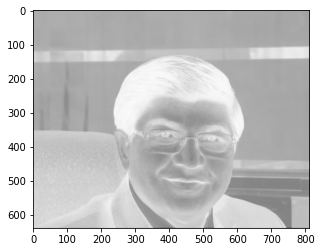

In [154]:
plt.imshow(xyz[0],cmap='gray')
plt.show()

In [31]:
# Writing file
#cv2.imwrite("C:\MLAI\image.jpg",ld)

True

In [23]:
x = input("Enter comma seperated kernel values").split(',')
print(x)

['0', '1', '-0.5', '-0.6', '0', '2']


In [ ]:
f_dim = [int(( (len(grimg[0]) - len(filter[0]) ) /stride[1]) +1), int(((len(grimg[1]) -len(filter[1]) ) /stride[0]) +1)]